In [1]:
# %matplotlib notebook - this function only updates the existing plot .. that is why multiple plots are being overwitten

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# File to Load 
city_data_load = "raw_data/city_data.csv"
ride_data_load = "raw_data/ride_data.csv"

city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)

pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])

pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
grouped_type_df = pyber_data.groupby(["city","type"])
city_total_rides = grouped_type_df["ride_id"].count()
city_driver_count = grouped_type_df["driver_count"].mean()
city_avg_fare = grouped_type_df["fare"].mean()
city_final_df = pd.DataFrame({"Average Fare": city_avg_fare,
                             "Rides Per City":city_total_rides,
                             "Driver Count":city_driver_count})
# city_final_df_ind = city_final_df.reset_index()
city_final_df.head()
# grouped_type_df.head()
# print(city_total_rides)

,,Average Fare,Driver Count,Rides Per City
city,type,,,
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


In [5]:
pyber_data_rural_df = pyber_data.loc[pyber_data["type"] == "Rural", :]
ride_city_df_group_rural = pyber_data_rural_df.groupby(["city","type"])
ride_city_df_rideid_ctr_rural = ride_city_df_group_rural["ride_id"].count()
ride_city_df_driver_ctr_rural = ride_city_df_group_rural["driver_count"].count()
ride_city_df_avgfare_rural = ride_city_df_group_rural["fare"].mean()

pyber_data_urban_df = pyber_data.loc[pyber_data["type"] == "Urban", :]
ride_city_df_group_urban = pyber_data_urban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_urban = ride_city_df_group_urban["ride_id"].count()
ride_city_df_driver_ctr_urban = ride_city_df_group_urban["driver_count"].count()
ride_city_df_avgfare_urban = ride_city_df_group_urban["fare"].mean()

pyber_data_suburban_df = pyber_data.loc[pyber_data["type"] == "Suburban", :]
ride_city_df_group_suburban = pyber_data_suburban_df.groupby(["city","type"])
ride_city_df_rideid_ctr_suburban = ride_city_df_group_suburban["ride_id"].count()
ride_city_df_driver_ctr_suburban = ride_city_df_group_suburban["driver_count"].count()
ride_city_df_avgfare_suburban = ride_city_df_group_suburban["fare"].mean()

# rural_driver_count = rural_cities.groupby(["city"].mean()["driver_count"])
pyber_data_urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


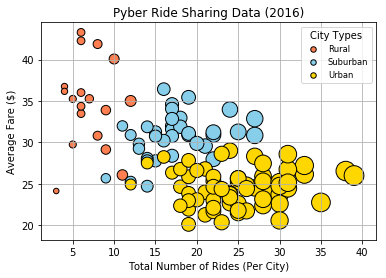

In [6]:
plt.scatter(ride_city_df_rideid_ctr_rural, 
            ride_city_df_avgfare_rural, 
            s=10*ride_city_df_driver_ctr_rural, 
            marker="o", 
            c="coral", 
            edgecolors="black", 
            label = "Rural")
plt.scatter(ride_city_df_rideid_ctr_suburban, 
            ride_city_df_avgfare_suburban, 
            s=10*ride_city_df_driver_ctr_suburban, 
            marker="o", 
            c="skyblue", 
            edgecolors="black", 
            label = "Suburban")
plt.scatter(ride_city_df_rideid_ctr_urban, 
            ride_city_df_avgfare_urban, 
            s=10*ride_city_df_driver_ctr_urban, 
            marker="o", 
            c="gold", 
            edgecolors="black", 
            label = "Urban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

x=city_total_rides
y=city_avg_fare
plt.grid()
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()
plt.savefig("Pyber.png")

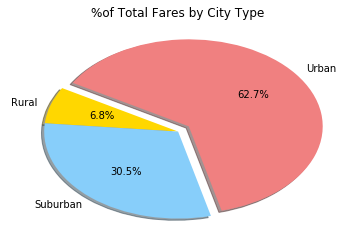

In [7]:
#% of Total Fares by City Type
tot_city_fare_type = 100 * pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()

plt.pie(tot_city_fare_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Fares by City Type")
plt.savefig("Fig1.png")
plt.show()
        

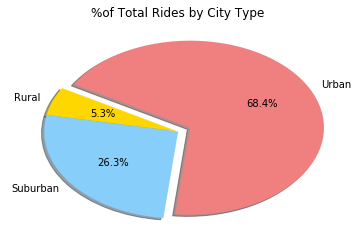

In [8]:
#% of Total Rides by City Type
tot_city_ride_type = 100 * pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count()

plt.pie(tot_city_ride_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Rides by City Type")
plt.savefig("Fig3.png")
plt.show()
        

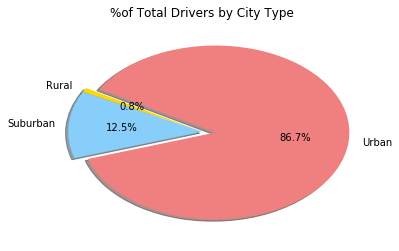

In [9]:
#% of Total Drivers by City Type
tot_city_count_type = 100 * pyber_data.groupby(["type"]).sum()["driver_count"] / pyber_data["driver_count"].sum()

plt.pie(tot_city_count_type,
        labels =["Rural","Suburban","Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode =[0,0,0.1],
        autopct='%1.1f%%',
        shadow =True, startangle =150)

plt.title("%of Total Drivers by City Type")
plt.savefig("Fig2.png")
plt.show()

# Analysis

## The total number of rides shared in urban cities is much higher and it ranges from 15 rides to 45 rides as compared to suburban shared rides that falls in an average range of 10 rides to 28 rides and rides in rural cities is much lower as compared to both urban and suburban that ranges from a few rides to 10 rides per city.
## Overall numbers show that higher number of drivers, have a proportional relationship to the  total number of rides undertaken; urban drivers and rides are proportionally higher (>40 rides are undertaken by more than 80% of the total drivers that are city drivers ).
## The average fare remained much lower for shared city rides that was between $20 and $30, by contrast, the average fare was much higher for rural shared rides (>$40).
## As a whole it is evident that urban areas show higher usage of shared rides than that the rural or suburban rides, however, more analysis and data is needed to obtain, for ex: what was the length of ride undertaken, etc. to define a good market differencial strategy.


